In [1]:
import logging
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

train_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_train_input.npy')
train_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_train_target.npy')
dev_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_validation_input.npy')
dev_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_validation_target.npy')
test_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_test_input.npy')
test_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_test_target.npy')



print("Training X shape: " + str(train_X.shape))
print("Training Y shape: " + str(train_Y.shape))
print("Dev X shape: " + str(dev_X.shape))
print("Dev Y shape: " + str(dev_Y.shape))
print("Test X shape: " + str(test_X.shape))
print("Test Y shape: " + str(test_Y.shape))

Mounted at /content/drive
Training X shape: (420, 128, 33)
Training Y shape: (420, 8)
Dev X shape: (120, 128, 33)
Dev Y shape: (120, 8)
Test X shape: (60, 128, 33)
Test Y shape: (60, 8)


In [4]:
# CREATE MODEL & COMPILE

input_shape = (train_X.shape[1], train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.00, recurrent_dropout=0.0, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=train_Y.shape[1], activation="softmax"))

opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

Build LSTM RNN model ...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128, 128)          82944     
                                                                 
 lstm_7 (LSTM)               (None, 128, 64)           49408     
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 145,032
Trainable params: 145,032
Non-trainable params: 0
_________________________________________________________________


In [6]:
# TRAINING MODEL
batch_size = 35  # num of training examples per minibatch
num_epochs = 400
history = model.fit(
    train_X,
    train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

Epoch 1/400
12/12 [==============================] - 15s 621ms/step - loss: 1.9311 - accuracy: 0.2810
Epoch 2/400
12/12 [==============================] - 7s 620ms/step - loss: 1.6971 - accuracy: 0.3619
Epoch 3/400
12/12 [==============================] - 7s 588ms/step - loss: 1.5041 - accuracy: 0.4619
Epoch 4/400
12/12 [==============================] - 7s 571ms/step - loss: 1.3408 - accuracy: 0.5190
Epoch 5/400
12/12 [==============================] - 7s 619ms/step - loss: 1.2913 - accuracy: 0.5167
Epoch 6/400
12/12 [==============================] - 7s 592ms/step - loss: 1.2102 - accuracy: 0.5571
Epoch 7/400
12/12 [==============================] - 7s 600ms/step - loss: 1.1670 - accuracy: 0.5738
Epoch 8/400
12/12 [==============================] - 7s 592ms/step - loss: 1.1576 - accuracy: 0.5619
Epoch 9/400
12/12 [==============================] - 7s 590ms/step - loss: 1.1470 - accuracy: 0.5810
Epoch 10/400
12/12 [==============================] - 7s 574ms/step - loss: 1.1874 - accur

In [ ]:
# Validation & Testing
score, accuracy = model.evaluate(
    dev_X, dev_Y, batch_size=batch_size, verbose=1
)
print("Validation loss:  ", score)
print("Validation accuracy:  ", accuracy)

score, accuracy = model.evaluate(
    test_X, test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)

4/4 [==============================] - 1s 79ms/step - loss: 1.4762 - accuracy: 0.6083
Validation loss:   1.4762179851531982
Validation accuracy:   0.6083333492279053
2/2 [==============================] - 0s 81ms/step - loss: 1.4194 - accuracy: 0.6500
Test loss:   1.4193580150604248
Test accuracy:   0.6499999761581421


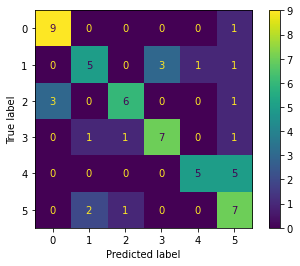

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(test_X)
matrix = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()


In [ ]:
# Creates a HDF5 file 'lstm_genre_classifier.h5'
model_filename = "/content/drive/Shared drives/CS 539 Project/goodClassifier.h5"
print("\nSaving model: " + model_filename)
model.save(model_filename)
# Creates a json file
model_json = model.to_json()
f = open("/content/drive/Shared drives/CS 539 Project/goodClassifier.json", "w")
f.write(model_json)
f.close()



Saving model: /content/drive/Shared drives/CS 539 Project/goodClassifier.h5
